# Heart Disease Risk Prediction


I## Step 1 Data Loading and Preprocessing#n his step, the UCI Heart Disease dataset was loaded. The target variable Heart Disease was converted from categorical text ("Presence"/"Absence") into a binary format (1 and 0). 6 key clinical features were selected: Age, Cholesterol, BP, Max HR, ST depression, and Number of vessels. To ensure the Gradient Descent algorithm converges efficiently, Z-score Normalization was applied to all features. Finally, the data was split into a 70% training set and a 30% testing set to evaluate model performance on unseen data.

In [4]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar el dataset
df = pd.read_csv('heart.csv') 

# 2. Binarizar el target (Presence = 1, Absence = 0)
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# 3. Selección de características (≥6 según tus instrucciones)
features = ['Age', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']
X = df[features].values
y = df['Heart Disease'].values.reshape(-1, 1)

# 4. Normalización (Z-score: (x - media) / desviación)

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_norm = (X - mu) / sigma

# 5. Split 70/30 
np.random.seed(42) 
m = X_norm.shape[0]
indices = np.random.permutation(m)
train_size = int(0.7 * m)

train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X_norm[train_idx], X_norm[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print(f"Dataset listo: {X_train.shape[0]} muestras de entrenamiento, {X_test.shape[0]} de prueba.")

Dataset listo: 189 muestras de entrenamiento, 81 de prueba.


## Step 2: Logic implementation

Here were implemented the Logistic Regression algorithm from scratch using NumPy. This includes the Sigmoid function to map linear outputs to probabilities, the Binary Cross-Entropy Cost Function to measure error, and the Gradient Descent optimizer. The model was trained for 1,500 iterations with a learning rate of $\alpha = 0.1$. The cost history plot below demonstrates the convergence of the algorithm

Iteración 0: Costo 0.6786
Iteración 100: Costo 0.4760
Iteración 200: Costo 0.4646
Iteración 300: Costo 0.4618
Iteración 400: Costo 0.4610
Iteración 500: Costo 0.4607
Iteración 600: Costo 0.4606
Iteración 700: Costo 0.4606
Iteración 800: Costo 0.4606
Iteración 900: Costo 0.4606
Iteración 1000: Costo 0.4606
Iteración 1100: Costo 0.4606
Iteración 1200: Costo 0.4606
Iteración 1300: Costo 0.4606
Iteración 1400: Costo 0.4606


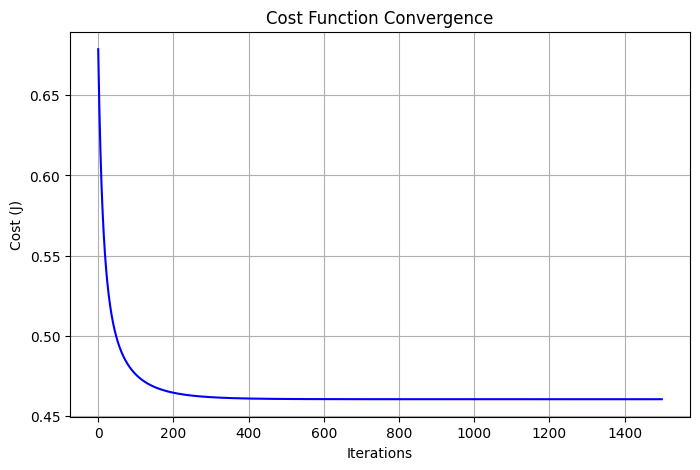

Test Accuracy: 74.07%


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    m = X.shape[0]
    h = sigmoid(np.dot(X, w) + b)
    # Evitamos log(0) con un epsilon pequeño
    epsilon = 1e-15
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, w_in, b_in, alpha, iterations):
    m = X.shape[0]
    cost_history = []
    w = w_in
    b = b_in
    
    for i in range(iterations):
        # Cálculo de la predicción
        h = sigmoid(np.dot(X, w) + b)
        
        # Gradientes
        err = h - y
        dj_dw = (1/m) * np.dot(X.T, err)
        dj_db = (1/m) * np.sum(err)
        
        # Actualización de parámetros
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Guardar costo
        if i < 100000: # Prevenir uso excesivo de memoria
            cost_history.append(compute_cost(X, y, w, b))
            
        if i % 100 == 0:
            print(f"Iteración {i}: Costo {cost_history[-1]:.4f}")
            
    return w, b, cost_history

# --- ENTRENAMIENTO ---
initial_w = np.zeros((X_train.shape[1], 1))
initial_b = 0.
iterations = 1500
alpha = 0.1 # Tasa de aprendizaje

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, iterations)

# 1. Visualization of Cost Convergence
plt.figure(figsize=(8,5))
plt.plot(J_hist, color='blue')
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.grid(True)
plt.show()

# 2. Prediction Function
def predict(X, w, b):
    probabilities = sigmoid(np.dot(X, w) + b)
    return (probabilities >= 0.5).astype(int)

# 3. Evaluation Metrics
y_pred = predict(X_test, w_final, b_final)
accuracy = np.mean(y_pred == y_test)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

## Step 3: Decision Boundary Visualization
To understand how the model separates patients with and without heart disease, It's visualized the decision boundaries for specific feature pairs. Since the model was trained on multiple features, these 2D plots represent a simplified version of the model's logic. The boundary line represents the "threshold" where the probability of disease is exactly 50%.

Iteración 0: Costo 0.6908
Iteración 100: Costo 0.6513
Iteración 200: Costo 0.6510
Iteración 300: Costo 0.6510
Iteración 400: Costo 0.6510
Iteración 500: Costo 0.6510
Iteración 600: Costo 0.6510
Iteración 700: Costo 0.6510
Iteración 800: Costo 0.6510
Iteración 900: Costo 0.6510


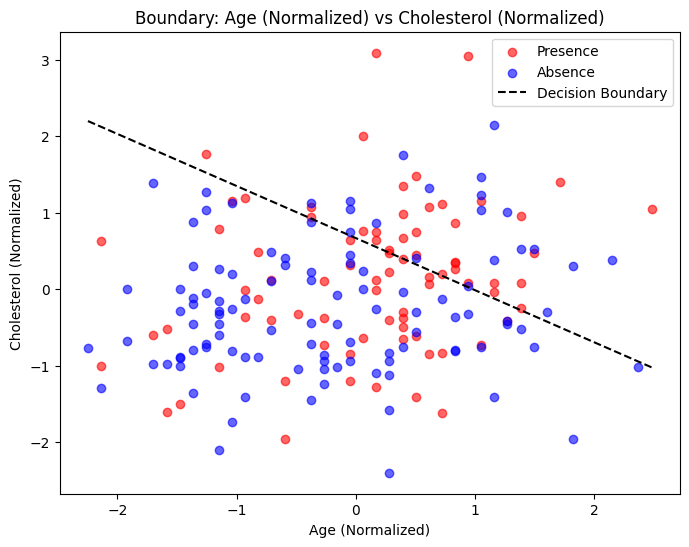

In [5]:
def plot_decision_boundary(X, y, feature_indices, feature_names):
    # We train a mini-model only on 2 features for visualization
    X_subset = X[:, feature_indices]
    w_mini = np.zeros((2, 1))
    b_mini = 0.
    w_mini, b_mini, _ = gradient_descent(X_subset, y, w_mini, b_mini, 0.1, 1000)
    
    plt.figure(figsize=(8, 6))
    # Scatter plot for data points
    plt.scatter(X_subset[y.flatten()==1, 0], X_subset[y.flatten()==1, 1], color='red', label='Presence', alpha=0.6)
    plt.scatter(X_subset[y.flatten()==0, 0], X_subset[y.flatten()==0, 1], color='blue', label='Absence', alpha=0.6)
    
    # Boundary line calculation: w1*x1 + w2*x2 + b = 0  => x2 = -(w1*x1 + b) / w2
    x_values = np.array([np.min(X_subset[:, 0]), np.max(X_subset[:, 0])])
    y_values = -(w_mini[0]*x_values + b_mini) / w_mini[1]
    
    plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f"Boundary: {feature_names[0]} vs {feature_names[1]}")
    plt.legend()
    plt.show()

# Example: Age vs Cholesterol (indices 0 and 1)
plot_decision_boundary(X_train, y_train, [0, 1], ['Age (Normalized)', 'Cholesterol (Normalized)'])